In [3]:
from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd

data_raw = pd.read_csv("/content/gdrive/MyDrive/data/so/survey_results_public.csv")

data = data_raw

display(data[:4])

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0


In [4]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [202]:
comp = data[["CompTotal", "Country", "Currency", "CompFreq"]][~pd.isna(data.CompTotal)]
comp[:4]

,CompTotal,Country,Currency,CompFreq
2,32000.0,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,Yearly
3,60000.0,Israel,ILS\tIsraeli new shekel,Monthly
8,46000.0,Netherlands,EUR European Euro,Yearly
10,48000.0,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,Yearly


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_ydensity : Removed 72 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 72 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 94 rows containing missing values.


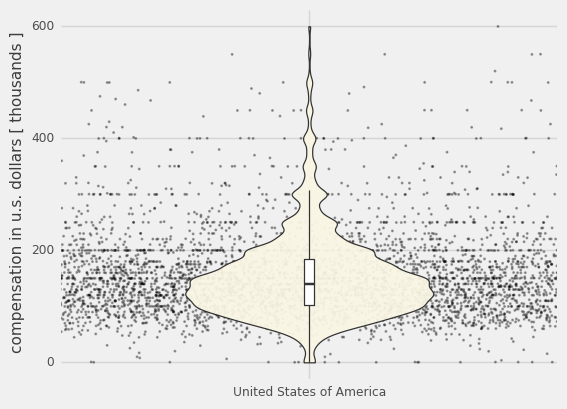

<ggplot: (8737593144131)>

In [203]:
from plotnine import ggplot, aes, geom_violin, geom_boxplot, geom_jitter, labs
from plotnine.scales import scale_y_continuous
from plotnine.scales.limits import lims
from plotnine.themes import theme_538 as theme, theme_set

theme_set(theme())

p = (ggplot(comp[(comp.Country == "United States of America") & (comp.Currency == "USD\tUnited States dollar") & (comp.CompFreq == "Yearly")])
    + aes(x="Country", y="CompTotal / 1e3")
+ geom_jitter(size=0.2, alpha=0.3, color="#000000", fill="#000000", width=1)
    + geom_violin(fill="#faf6E4", alpha=0.94, width=0.5)
    + geom_boxplot(outlier_shape="", width=0.02)
    + labs(title="", x="", y="compensation in u.s. dollars [ thousands ]")
    + lims(y=(0, 600e3 / 1e3))
)

p

In [127]:
languages = data["LanguageWantToWorkWith"][~pd.isna(data.LanguageWantToWorkWith)].tolist()
languages = [s.split(";") for s in languages]

def flatten(list):
    out = []
    for sublist in list:
        for item in sublist:
            out.append(item)
    return out

languages = pd.DataFrame(flatten(languages))

language_summary = pd.DataFrame(languages.value_counts(), columns=["count"])
language_summary.reset_index(inplace=True)
language_summary = language_summary.rename(columns={0: "language"})

language_summary[:8]

,language,count
0,JavaScript,31551
1,Python,29350
2,TypeScript,26050
3,HTML/CSS,25423
4,SQL,24804
5,Rust,17113
6,C#,15681
7,Go,15500


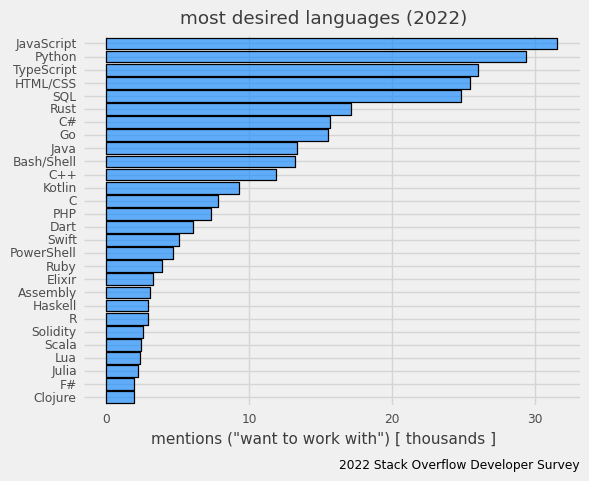

<ggplot: (8737593701524)>

In [180]:
from plotnine import ggplot, aes, geom_col, coord_flip, labs

p = (ggplot(language_summary[:28])
    + aes(x="reorder(language, count)", y="count / 1e3")
    + geom_col(fill="#0080ff", color="#000", alpha=0.6)
    + coord_flip()
    + labs(
        title="most desired languages (2022)",
        x="",
        y="mentions (\"want to work with\") [ thousands ]",
        caption="2022 Stack Overflow Developer Survey",
    )
)
p

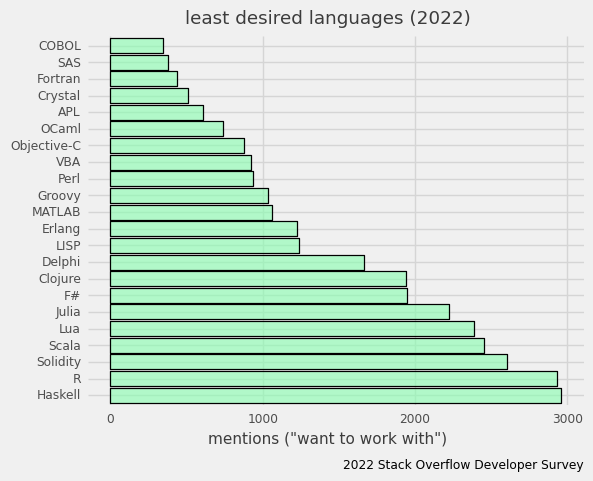

<ggplot: (8737592237717)>

In [179]:
from plotnine import ggplot, aes, geom_col, coord_flip, labs

p = (ggplot(language_summary[20:])
    + aes(x="reorder(language, -count)", y="count")
    + geom_col(fill="#87ffaf", color="#000", alpha=0.6)
    + coord_flip()
    + labs(
        title="least desired languages (2022)",
        x="",
        y="mentions (\"want to work with\")",
        caption="2022 Stack Overflow Developer Survey",
    )
)
p